# Import modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
%matplotlib inline

# Import stations of interest
These stations recorded Toluene and Benzene in $\mu$gm$^{-3}$. However, model results only was setup to get Toluene in ppm(v) units. The script `wrf_extract.py` shows the equation used to convert units.

In [2]:
stations = pd.read_csv('../PythonObsData/stations_hc.csv')
#stations = stations.loc[stations.domain =='d02']\
#            .drop('domain', axis=1).sort_values(by='code')
stations.index =stations.code
stations

,name,lat,lon,code,type,domain,abb
code,,,,,,,
91,Cerqueira César,-23.553543,-46.672705,91,Urban,d02,CeC
117,Paulínia,-22.772321,-47.154843,117,Industry,d02,Pln
99,Pinheiros,-23.561460,-46.702017,99,Urban,d02,Pinh
100,S.André-Capuava,-23.639804,-46.491637,100,Urban,d02,SACp
88,S.José Campos,-23.187887,-45.871198,88,Regional urban,d02,SJCp
278,S.José Campos-Vista Verde,-23.183697,-45.830897,278,Regional urban,d02,SJCV


# Observations and Model results
We import observations downloaded from QUALAR:

In [3]:
def data_import(path, stations):
    files = open(path, "rb")
    pol = pkl.load(files)
    files.close()
    df = pd.DataFrame()

    for n in list(pol.keys()):
        df1 = pol[n]
        df1['station'] = n
        df1['type'] = stations[stations.name == n].type.values[0]
        df = pd.concat([df,df1])
    return df

In [4]:
obs = data_import('../PythonObsData/data/data_all_photo.pkl',stations).drop('code',axis=1)
parameters = ['o3', 'no', 'no2', 'co', 'ben', 'tol', 'pm10', 'pm2.5']
for p in parameters:
    obs[p] = obs[p].astype(float)
obs.reset_index(inplace=True)
obs.rename(columns={'index':'local_date'}, inplace=True)
display(obs, obs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype                            
---  ------      --------------  -----                            
 0   local_date  8790 non-null   datetime64[ns, America/Sao_Paulo]
 1   o3          5173 non-null   float64                          
 2   no          5379 non-null   float64                          
 3   no2         5379 non-null   float64                          
 4   co          2210 non-null   float64                          
 5   ben         6906 non-null   float64                          
 6   tol         6906 non-null   float64                          
 7   pm10        6720 non-null   float64                          
 8   pm2.5       1454 non-null   float64                          
 9   station     8790 non-null   object                           
 10  type        8790 non-null   object                           
dtypes: datetime64[ns,

,local_date,o3,no,no2,co,ben,tol,pm10,pm2.5,station,type
0,2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerqueira César,Urban
1,2018-09-01 01:00:00-03:00,NaN,NaN,NaN,1.3,NaN,NaN,87.0,NaN,Cerqueira César,Urban
2,2018-09-01 02:00:00-03:00,NaN,128.0,99.0,1.4,NaN,NaN,81.0,NaN,Cerqueira César,Urban
3,2018-09-01 03:00:00-03:00,NaN,215.0,110.0,2.3,NaN,NaN,92.0,NaN,Cerqueira César,Urban
4,2018-09-01 04:00:00-03:00,NaN,160.0,96.0,1.9,NaN,NaN,96.0,NaN,Cerqueira César,Urban
...,...,...,...,...,...,...,...,...,...,...,...
8785,2018-10-31 20:00:00-03:00,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,S.José Campos-Vista Verde,Regional urban
8786,2018-10-31 21:00:00-03:00,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,S.José Campos-Vista Verde,Regional urban
8787,2018-10-31 22:00:00-03:00,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,S.José Campos-Vista Verde,Regional urban
8788,2018-10-31 23:00:00-03:00,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,S.José Campos-Vista Verde,Regional urban


None

We import model results for this station considered Toluene in $\mu$gm$^{-3}$ units.

In [5]:
path = '../3_Results/Y2018/wrfout_exp10/'
mod_sep18 = data_import(path+'sep18/FINd02_2018_09.pkl', stations)
mod_oct18 = data_import(path+'oct18/FINd02_2018_10.pkl', stations)

mod = pd.concat([mod_sep18,mod_oct18])
mod = mod.drop(['date','code','name'],axis=1)
mod

,tc,rh,ws,wd,o3,no,no2,co,tol,local_date,station,type
0,24.618683,39.892826,0.787255,47.347431,0.000342,84.444092,97.893852,0.572831,29.926291,2018-08-31 21:00:00-03:00,Cerqueira César,Urban
1,23.594269,47.770557,1.902859,101.854248,0.000151,101.396942,119.454071,0.714865,38.731522,2018-08-31 22:00:00-03:00,Cerqueira César,Urban
2,22.890137,42.133934,1.876444,17.667826,0.000748,69.744751,92.660881,0.509956,26.455488,2018-08-31 23:00:00-03:00,Cerqueira César,Urban
3,22.074982,47.794853,1.704357,61.801872,0.013703,57.985794,80.801933,0.438299,22.064146,2018-09-01 00:00:00-03:00,Cerqueira César,Urban
4,21.554626,51.342117,1.858457,84.079781,0.083921,51.423229,77.629646,0.394047,19.375708,2018-09-01 01:00:00-03:00,Cerqueira César,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
739,32.145050,41.126530,1.385343,271.072815,91.817947,0.824740,6.898693,0.105652,1.738901,2018-10-31 16:00:00-03:00,S.José Campos-Vista Verde,Regional urban
740,31.442078,45.817371,1.835186,230.191864,83.925163,1.094326,9.406319,0.114910,2.668729,2018-10-31 17:00:00-03:00,S.José Campos-Vista Verde,Regional urban
741,27.687347,60.579742,4.612447,137.594818,87.464119,0.363775,12.531299,0.161095,3.734112,2018-10-31 18:00:00-03:00,S.José Campos-Vista Verde,Regional urban
742,26.869263,61.063416,3.576854,122.557365,88.421143,0.096207,12.370105,0.159259,3.143926,2018-10-31 19:00:00-03:00,S.José Campos-Vista Verde,Regional urban


In [6]:
data= obs.merge(mod, 
          on=['local_date','station','type'],
          suffixes=('_obs', '_mod')).drop(['tc','pm10','pm2.5','rh','ws','wd'], axis=1)
data.set_index('local_date', inplace=True)
data

,o3_obs,no_obs,no2_obs,co_obs,ben,tol_obs,station,type,o3_mod,no_mod,no2_mod,co_mod,tol_mod
local_date,,,,,,,,,,,,,
2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,Cerqueira César,Urban,0.013703,57.985794,80.801933,0.438299,22.064146
2018-09-01 01:00:00-03:00,NaN,NaN,NaN,1.3,NaN,NaN,Cerqueira César,Urban,0.083921,51.423229,77.629646,0.394047,19.375708
2018-09-01 02:00:00-03:00,NaN,128.0,99.0,1.4,NaN,NaN,Cerqueira César,Urban,0.049001,57.384579,74.641617,0.398275,19.731558
2018-09-01 03:00:00-03:00,NaN,215.0,110.0,2.3,NaN,NaN,Cerqueira César,Urban,0.075060,56.756088,72.731819,0.385220,18.990664
2018-09-01 04:00:00-03:00,NaN,160.0,96.0,1.9,NaN,NaN,Cerqueira César,Urban,0.090665,57.423748,71.710396,0.381271,18.764383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-31 16:00:00-03:00,NaN,NaN,NaN,NaN,0.0,1.0,S.José Campos-Vista Verde,Regional urban,91.817947,0.824740,6.898693,0.105652,1.738901
2018-10-31 17:00:00-03:00,NaN,NaN,NaN,NaN,0.0,1.0,S.José Campos-Vista Verde,Regional urban,83.925163,1.094326,9.406319,0.114910,2.668729
2018-10-31 18:00:00-03:00,NaN,NaN,NaN,NaN,1.0,2.0,S.José Campos-Vista Verde,Regional urban,87.464119,0.363775,12.531299,0.161095,3.734112


# Exploratory data analysis (EDA)

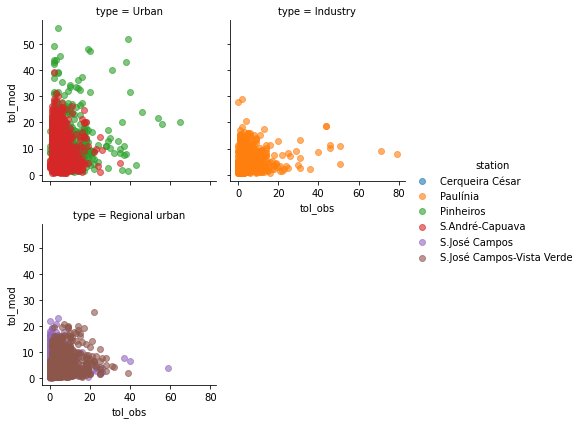

In [19]:
df_1 = data[['station','type','tol_obs','tol_mod','o3_obs','o3_mod',
           'no_obs','no_mod','no2_obs','no2_mod','co_obs','co_mod']].dropna(how='all')
g = sns.FacetGrid(df_1, col='type', hue='station', col_wrap=2)
g.map(plt.scatter, 'tol_obs', 'tol_mod', alpha=.6)
g.add_legend(ncol=1)
plt.show()
#g.savefig('../PythonWRF/fig/eda_no_no2.pdf', bbox_inches='tight', facecolor='w')

In [18]:
df_1.columns

Index(['station', 'type', 'tol_obs', 'tol_mod', 'o3_obs', 'o3_mod', 'no_obs',
       'no_mod', 'no2_obs', 'no2_mod', 'co_obs', 'co_mod'],
      dtype='object')

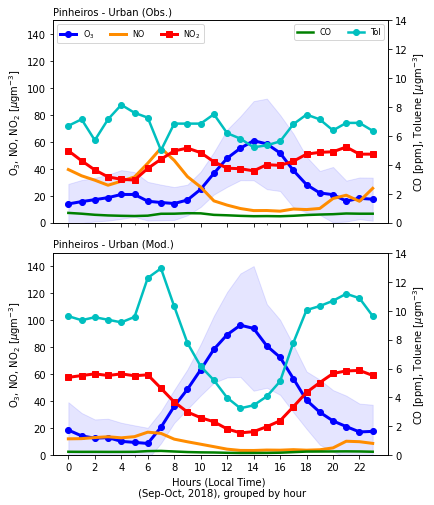

In [98]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(6,4*2), gridspec_kw={'hspace':0.15})
alpha = .1
t = 'Urban'
df = df_1[df_1.type == t].dropna()
mean = df.groupby(df.index.hour).mean()
sd = df.groupby(df.index.hour).std()

# Observed values
mean.plot(y=['o3_obs', 'no_obs', 'no2_obs'], 
          style=['-o','-','-s'], 
          color=['b', 'darkorange','r'], 
          lw=3,ax=ax[0], legend=False)
ax[0].fill_between(mean.index, mean.o3_obs+sd.o3_obs,mean.o3_obs-sd.o3_obs,
                       color='b',alpha=alpha )
ax[0].set_ylim(0,150)
ax[0].set_title(str(df.station.unique()[0])+' - '+t + ' (Obs.)', loc='left', fontsize=10)
ax[0].set_xlabel('Hours (Local Time)')
plt.xticks(np.arange(0,24,2))
    
    
ax1 = ax[0].twinx()
mean.plot(y=['co_obs','tol_obs'], ax=ax1, style=['-g','-oc'], lw=2.5, legend=False)
ax1.set_ylim(0,14)

ax[0].set_ylabel('O$_3$, NO, NO$_2$ [$\mu$gm$^{-3}$]', loc='center')
ax1.set_ylabel('CO [ppm], Toluene [$\mu$gm$^{-3}$]',loc='center')
ax[0].legend(['O$_3$','NO','NO$_2$'], ncol=3, fontsize=8, loc=2)
ax1.legend(['CO','Tol'], fontsize=8, loc=1, ncol=2)

# Simulated values
mean.plot(y=['o3_mod', 'no_mod', 'no2_mod'], 
          style=['-o','-','-s'], 
          color=['b', 'darkorange','r'], 
          lw=3,ax=ax[1], legend=False)
ax[1].fill_between(mean.index, mean.o3_mod+sd.o3_mod,mean.o3_mod-sd.o3_mod,
                       color='b',alpha=alpha )
ax[1].set_ylim(0,150)
ax[1].set_title(str(df.station.unique()[0])+' - '+t + ' (Mod.)', loc='left', fontsize=10)
ax[1].set_xlabel('Hours (Local Time) \n (Sep-Oct, 2018), grouped by hour')
plt.xticks(np.arange(0,24,2))
    
ax2 = ax[1].twinx()
mean.plot(y=['co_mod','tol_mod'], ax=ax2, style=['-g','o-c'], lw=2.5, legend=False)
ax2.set_ylim(0,14)

ax[1].set_ylabel('O$_3$, NO, NO$_2$ [$\mu$gm$^{-3}$]', loc='center')
ax2.set_ylabel('CO [ppm], Toluene [$\mu$gm$^{-3}$]',loc='center')
#ax[1].legend(['O$_3$','NO','NO$_2$'], ncol=3, fontsize=8, loc=2)
#ax2.legend(['CO','Tol'], fontsize=8, loc=1, ncol=2)
fig.savefig('../4_Draft_Report/Dissertation/fig/pol_hour_tol.pdf',bbox_inches='tight', facecolor='w')

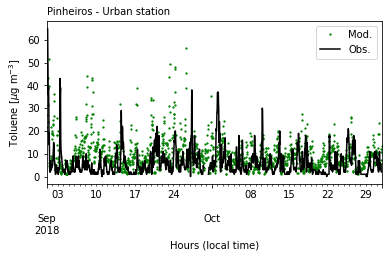

In [96]:
fig, ax = plt.subplots(figsize=(6,3))
data[data.station=='Pinheiros'].plot(y=['tol_mod','tol_obs'], style=['.g','-k'], ax=ax, markersize=2.5)
ax.legend(['Mod.','Obs.'])
ax.set_xlabel('Hours (local time)')
ax.set_ylabel('Toluene [$\mu$g m$^{-3}$]')
ax.set_title('Pinheiros - Urban station', loc='left', fontsize=10)
fig.savefig('../4_Draft_Report/Dissertation/fig/tseries_tol.pdf', bbox_inches='tight', facecolor='w')